In [1]:
#| hide

# This cell will not be rendered but is to hide warnings and limit the rows shown

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('statsforecast').setLevel(logging.ERROR)

import pandas as pd
pd.set_option('display.max_rows', 6)

# CrostonClassic Model

> Step-by-step guide on using the `CrostonClassic Model` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

## Table of Contents

* [Introduction](#introduction)
* [Croston Classic Model](#model)
* [Loading libraries and data](#loading)
* [Explore data with the plot method](#plotting)
* [Split the data into training and testing](#splitting)
* [Implementation of CrostonClassis with StatsForecast](#implementation)
* [Cross-validation](#cross_validate)
* [Model evaluation](#evaluate)
* [References](#references)

## Introduction <a class="anchor" id="introduction"></a>

The Croston model is a method used in time series analysis to forecast demand in situations where there are intermittent data or frequent zeros. It was developed by J.D. Croston in 1972 and is especially useful in industries such as inventory management, retail sales, and demand forecasting for products with low sales frequency.

The Croston model is based on two main components:

1. Intermittent Demand Rate: Calculates the demand rate for periods in which sales or events occur, ignoring periods without sales. This rate is used to estimate the probability that a claim will occur in the future.

2. Demand Interval: Calculates the time interval between sales or events occurring, again ignoring non-sales periods. This interval is used to estimate the probability that a demand will occur in the next period.

The Croston model combines these two estimates to generate a weighted forecast that takes into account both the rate of intermittent demand and the interval between demands. This approach helps address the challenge of forecasting demand in situations where the time series has many zeros or missing values.

It is important to note that the Croston model is a simplification and does not account for other possible sources of variability or patterns in the demand data. Therefore, its accuracy may be affected in situations where there are external factors or changes in demand behavior.

## Croston Classic Model <a class="anchor" id="model"></a>

###  What is intermittent demand?

Intermittent demand is a demand pattern characterized by the irregular and sporadic occurrence of events or sales. In other words, it refers to situations in which the demand for a product or service occurs intermittently, with periods of time in which there are no sales or significant events.

Intermittent demand differs from constant or regular demand, where sales occur in a predictable and consistent manner over time. In contrast, in intermittent demand, periods without sales may be long and there may not be a regular sequence of events.

This type of demand can occur in different industries and contexts, such as low consumption products, seasonal products, high variability products, products with short life cycles, or in situations where demand depends on specific events or external factors.

Intermittent demand can pose challenges in forecasting and inventory management, as it is difficult to predict when sales will occur and in what quantity. Methods like the Croston model, which I mentioned earlier, are used to address intermittent demand and generate more accurate and appropriate forecasts for this type of demand pattern.

###  Problem with intermittent demand

Intermittent demand can present various challenges and issues in inventory management and demand forecasting. Some of the common problems associated with intermittent demand are as follows:

1. Unpredictable variability: Intermittent demand can have unpredictable variability, making planning and forecasting difficult. Demand patterns can be irregular and fluctuate dramatically between periods with sales and periods without sales.

2. Low frequency of sales: Intermittent demand is characterized by long periods without sales. This can lead to inventory management difficulties, as it is necessary to hold enough stock to meet demand when it occurs, while avoiding excess inventory during non-sales periods.

3. Forecast error: Forecasting intermittent demand can be more difficult to pin down than constant demand. Traditional forecast models may not be adequate to capture the variability and lack of patterns in intermittent demand, which can lead to significant errors in estimates of future demand.

4. Impact on the supply chain: Intermittent demand can affect the efficiency of the supply chain and create difficulties in production planning, supplier management and logistics. Lead times and inventory levels must be adjusted to meet unpredictable demand.

5. Operating costs: Managing inventory in situations of intermittent demand can increase operating costs. Maintaining adequate inventory during non-sales periods and managing stock levels may require additional investments in storage and logistics.

To address these issues, specific approaches to intermittent demand management are used, such as specialized forecasting models, product classification techniques, and tailored inventory strategies. These solutions seek to minimize the impacts of variability and lack of patterns in intermittent demand, optimizing inventory management and improving supply chain efficiency.

### Croston’s method(CR)

Croston’s method(CR) is a classic method that specifically dealing with intermittent demand, it was developed base upon the Simple Exponential Smoothing method. When Croston dealing with the intermittent demand, he found out that by using the SES, the level of forecasting in each period’s demand are normally higher than it’s actual value, which lead to a very low accuracy.  After a period of times of research, he came out a method that optimize the result of  the intermittent demand forecasting.

This method basically decompose the intermittent demand into two parts: the size of non-zero demand and the time interval of those demand occurred, and then apply the simple exponential smoothing on both part. Where the formula is follow:

if $Z_t=0$ then:

$$Z'_t= Z'_{t-1}$$

$$P'_t= P'_{t-1}$$

Otherwise

$$Z'_t=\alpha Z_t +(1-\alpha) Z'_{t-1}$$

$$P'_t=\alpha P_t +(1-\alpha) P'_{t-1}$$

where $0< \alpha < 1$

And finally by combining these forecasts  

$${Y'}_t = \frac{{Z'}_t}{{P'}_t}$$

Where

* ${Y'}_t:$ Average demand per period.
* $Z_t:$ Actual demand at period $t$.
* $Z'_t:$ Time between two positive demand.
* $P:$ Demand size forecast for next period.
* $P_t:$ Forecast of demand interval.
* $\alpha :$ Smoothing constant.

Croston’s method converse the intermittent demand time series into a non-zero demand time series and a demand interval time series, many cases show that this method work quite well, but before apply Croston’s method, three assumptions should be made:

* The non-zero demand are independent and obey normal distribution;
* The demand intervals are independent and obey geometric distribution;
* There are mutual independence between the demand size and demand intervals.

According to many real cases show that, Croston’s method is suitable for the situation which the lead time obey normal distribution, for those demand series which contain large amount of zero values, Croston’s method did not shows a outstanding performance, sometimes even worse than SES method.

Additionally, Croston’s method can only provide the average demand for each period, it can not give a forecast of the demand size for each period, it can not forecast which period will occurred a demand, and it also can not come out a probability of whether a period will occurred a demand. 

After all, although Croston’s method is a very classic and wide use method, it still has a lots of limitations, but after years of research carried by statisticians and scholars, few variations of Croston’s method were brought up.


### Croston’s variations

Croston’s method is the main model used in demand forecasting area, most of the works are based upon this model. However, in 2001 Syntetos and Boylan proposed that Croston’s method is no a unbiased method, while some empirical evidence also showed that the losses in performance which use the Croston’s method (Sani and Kingsman, 1997).
Plenty of further research is done in improving the Croston’s method. Syntetos and Boylan (2005) proposed an approximate unbiased procedure that provide less variance in the result of estimate, which is known as SBA (Syntetos and Boylan Approximate). Recently, Teunter et al. (2011) also proposed a intermittent forecasting method that can deal with obsolescence, which is based on Croston’s method known as TSB method (Teunter, Syntetos and Babai).

### Area of application of the Croston method

The Croston method is commonly applied in the field of inventory management and demand forecasting in situations of intermittent demand. Some specific areas where the Croston model can be applied are:

1. Inventory management: The Croston model is used to forecast demand for products with sporadic or intermittent sales. Helps determine optimal inventory levels and replenishment policies, minimizing inventory costs and ensuring adequate availability to meet intermittent demand.

2. Retail sales: In the retail sector, especially in products with low sales frequency or irregular sales, the Croston model can be useful for forecasting demand and optimizing inventory planning in stores or warehouses.

3. Demand forecasting: In general, the Croston model is applied in demand forecasting when there is a lack of clear patterns or high variability in the time series. It can be used in various industries, such as the pharmaceutical industry, the automotive industry, the perishable goods industry, and other sectors where intermittent demand is common.

4. Supply Chain Planning: The Croston model can be used in supply chain planning and management to improve the accuracy of intermittent demand forecasts. This helps streamline production, inventory management, supplier order scheduling, and other aspects of the supply chain.

It is important to note that Croston's model is just one of many approaches available to address intermittent demand. Depending on the context and the specific characteristics of the time series, there may be other more appropriate methods and techniques.

### Croston Method for Stationary Time Series

No, the time series in the Croston method does not have to be stationary. The Croston method is an effective forecasting method for intermittent time series, even if they are not stationary. However, if the time series is stationary, the Croston method may be more accurate.

The Croston method is based on the idea that intermittent time series can be decomposed into two components: a demand component and a time between demands component. The demand component is forecast using a standard time series forecasting method, such as single or double exponential smoothing. The time component between demands is forecast using a probability distribution function, such as a Poisson distribution or a Weibull distribution.

The Croston method then combines the forecasts for the two components to obtain a total demand forecast for the next period.

If the time series is stationary, the two components of the time series will be stationary as well. This means that the Croston method will be able to forecast the two components more accurately.

However, even if the time series is not stationary, the Croston method can still be an effective forecasting method. The Croston method is a robust method that can handle time series with irregular demand patterns.

If you are using the Croston method to forecast an intermittent time series that is not stationary, it is important to choose a standard time series forecast method that is effective for nonstationary time series. Double exponential smoothing is an effective forecasting method for non-stationary time series.

## Loading libraries and data <a class="anchor" id="loading"></a>

:::{.callout-tip} Statsforecast will be needed. To install, see [instructions](../getting-started/Installation.ipynb). :::

Next, we import plotting libraries and configure the plotting style.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)


from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [3]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/intermittend_demand2")
df.head()

,date,sales
0,2022-01-01 00:00:00,0
1,2022-01-01 01:00:00,10
2,2022-01-01 02:00:00,0
3,2022-01-01 03:00:00,0
4,2022-01-01 04:00:00,100


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2022-01-01 00:00:00,0,1
1,2022-01-01 01:00:00,10,1
2,2022-01-01 02:00:00,0,1
3,2022-01-01 03:00:00,0,1
4,2022-01-01 04:00:00,100,1


In [5]:
print(df.dtypes)

ds           object
y             int64
unique_id    object
dtype: object


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [6]:
df["ds"] = pd.to_datetime(df["ds"])

## Explore Data with the plot method <a class="anchor" id="plotting"></a>

Plot some series using the plot method from the StatsForecast class. This method prints a random series from the dataset and is useful for basic EDA.

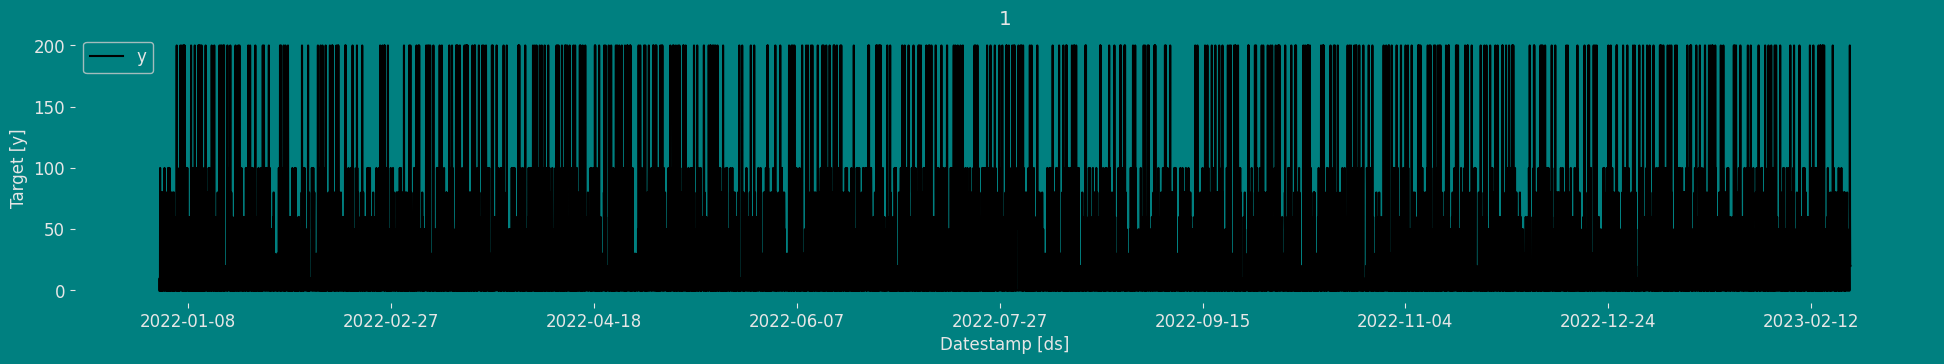

In [7]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

### Autocorrelation plots

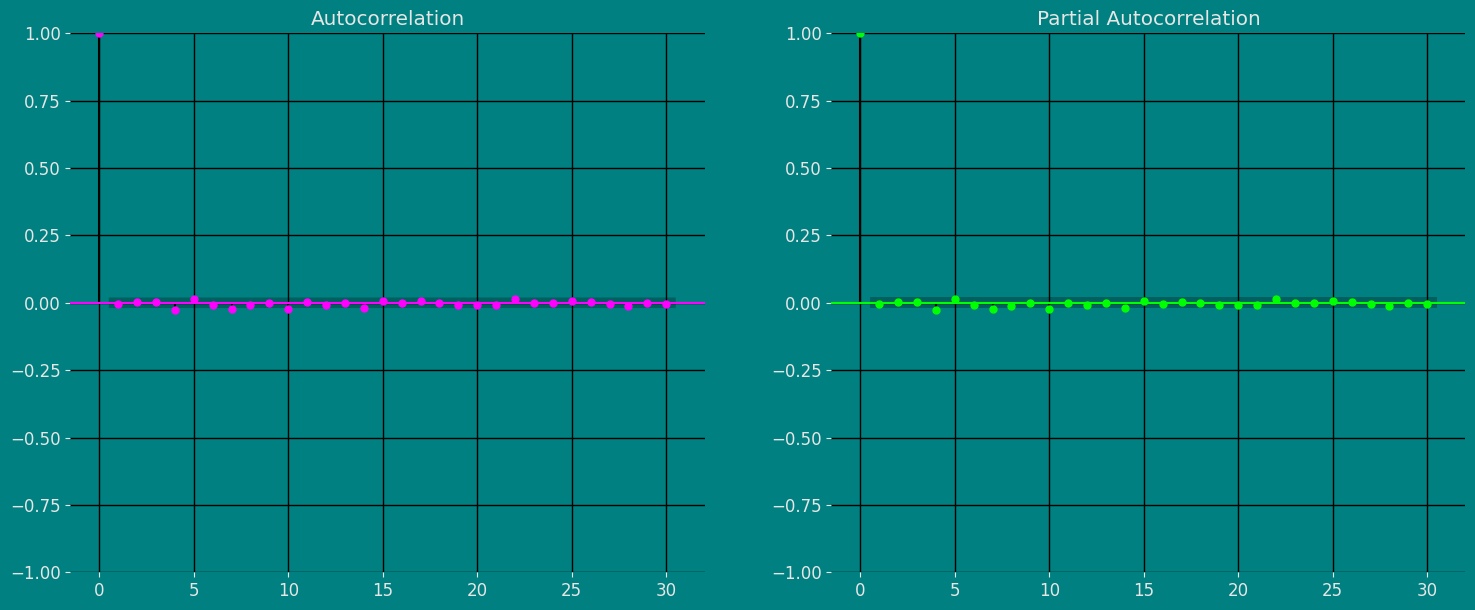

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

### Decomposition of the time series

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* Multiplicative

### Additive time series

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

### Multiplicative time series

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plotSeasonalDecompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
    title="Seasonal Decomposition"):

    result = seasonal_decompose(
            x, model=model, filt=filt, period=period,
            two_sided=two_sided, extrapolate_trend=extrapolate_trend)
    fig = make_subplots(
            rows=4, cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"])
    for idx, col in enumerate(['observed', 'trend', 'seasonal', 'resid']):
        fig.add_trace(
            go.Scatter(x=result.observed.index, y=getattr(result, col), mode='lines'),
                row=idx+1, col=1,
            )
    return fig

In [10]:
plotSeasonalDecompose(
    df["y"],
    model="additive",
    period=24,
    title="Seasonal Decomposition")

## Split the data into training and testing<a class="anchor" id="splitting"></a>

Let's divide our data into sets

1. Data to train our `Croston Classic Model`.
2. Data to test our model

For the test data we will use the last 500 hours to test and evaluate the performance of our model.

In [11]:
train = df[df.ds<='2023-01-31 19:00:00'] 
test = df[df.ds>'2023-01-31 19:00:00'] 

In [12]:
train.shape, test.shape

((9500, 3), (500, 3))

Now let's plot the training data and the test data.

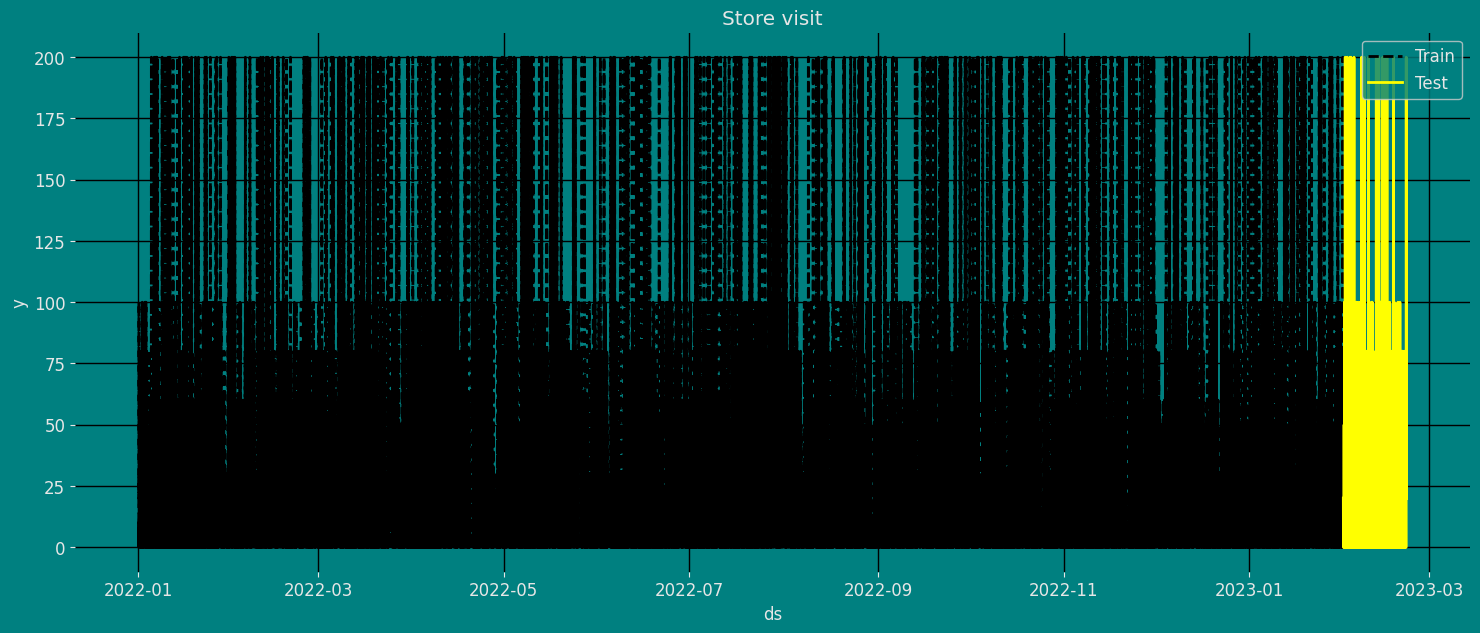

In [13]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color="yellow")
plt.title("Store visit");
plt.show()

## Implementation of CrostonClassic with StatsForecast <a class="anchor" id="implementation"></a>

To also know more about the parameters of the functions of the `CrostonClassic Model`, they are listed below. For more information, visit the [documentation](https://nixtla.github.io/statsforecast/src/core/models.html#crostonclassic).

```
alias : str
    Custom name of the model.
```

### Load libraries

In [14]:
from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic

### Building Model
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/) by the master, Rob Hyndmann, can be useful for `season_length`.


In [15]:
season_length = 24 # Hourly data 
horizon = len(test) # number of predictions

models = [CrostonClassic()]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [pandas’ available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [16]:
sf = StatsForecast(df=df,
                   models=models,
                   freq='H', 
                   n_jobs=-1)

### Fit the Model

In [17]:
sf.fit()

StatsForecast(models=[CrostonClassic])

Let's see the results of our `Croston Classic Model`. We can observe it with the following instruction:

In [18]:
result=sf.fitted_[0,0].model_
result

{'mean': array([23.606695], dtype=float32)}

### Forecast Method

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 25 week ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min.

In [19]:
Y_hat = sf.forecast(horizon)
Y_hat

,ds,CrostonClassic
unique_id,,
1,2023-02-21 16:00:00,23.606695
1,2023-02-21 17:00:00,23.606695
1,2023-02-21 18:00:00,23.606695
...,...,...
1,2023-03-14 09:00:00,23.606695
1,2023-03-14 10:00:00,23.606695
1,2023-03-14 11:00:00,23.606695


In [20]:
Y_hat=Y_hat.reset_index()
Y_hat

,unique_id,ds,CrostonClassic
0,1,2023-02-21 16:00:00,23.606695
1,1,2023-02-21 17:00:00,23.606695
2,1,2023-02-21 18:00:00,23.606695
...,...,...,...
497,1,2023-03-14 09:00:00,23.606695
498,1,2023-03-14 10:00:00,23.606695
499,1,2023-03-14 11:00:00,23.606695


In [21]:
Y_hat1 = pd.concat([df,Y_hat])
Y_hat1

,ds,y,unique_id,CrostonClassic
0,2022-01-01 00:00:00,0.0,1,NaN
1,2022-01-01 01:00:00,10.0,1,NaN
2,2022-01-01 02:00:00,0.0,1,NaN
...,...,...,...,...
497,2023-03-14 09:00:00,NaN,1,23.606695
498,2023-03-14 10:00:00,NaN,1,23.606695
499,2023-03-14 11:00:00,NaN,1,23.606695


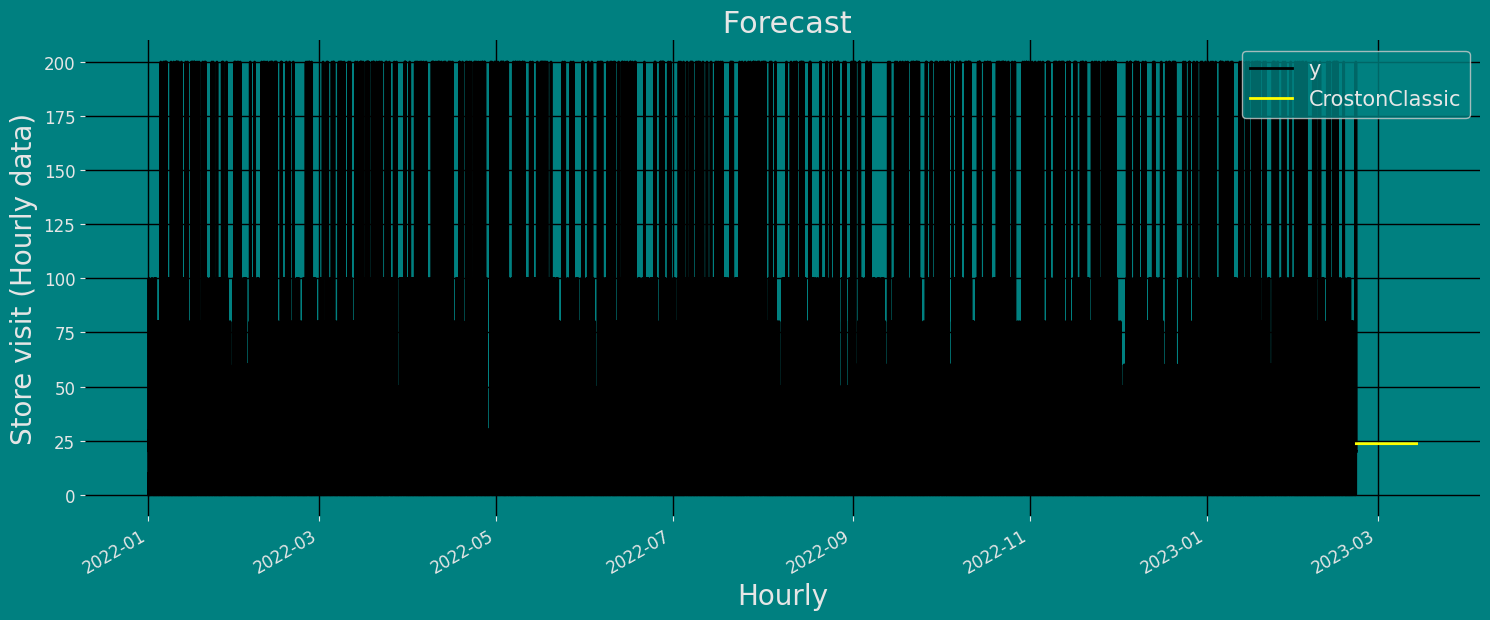

In [22]:
fig, ax = plt.subplots(1, 1)
plot_df = pd.concat([df, Y_hat1]).set_index('ds')
plot_df['y'].plot(ax=ax, linewidth=2)
plot_df[ "CrostonClassic"].plot(ax=ax, linewidth=2, color="yellow")
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Store visit (Hourly data)', fontsize=20)
ax.set_xlabel('Hourly', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid(True)

### Predict method with confidence interval

To generate forecasts use the predict method.

The predict method takes two arguments: forecasts the next `h` (for horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 500 hours ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [23]:
forecast_df = sf.predict(h=horizon) 
forecast_df

,ds,CrostonClassic
unique_id,,
1,2023-02-21 16:00:00,23.606695
1,2023-02-21 17:00:00,23.606695
1,2023-02-21 18:00:00,23.606695
...,...,...
1,2023-03-14 09:00:00,23.606695
1,2023-03-14 10:00:00,23.606695
1,2023-03-14 11:00:00,23.606695


We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [24]:
pd.concat([df, forecast_df]).set_index('ds')

,y,unique_id,CrostonClassic
ds,,,
2022-01-01 00:00:00,0.0,1.0,NaN
2022-01-01 01:00:00,10.0,1.0,NaN
2022-01-01 02:00:00,0.0,1.0,NaN
...,...,...,...
2023-03-14 09:00:00,NaN,NaN,23.606695
2023-03-14 10:00:00,NaN,NaN,23.606695
2023-03-14 11:00:00,NaN,NaN,23.606695


In [25]:
df_plot= pd.concat([df, forecast_df]).set_index('ds').tail(5000)
df_plot

,y,unique_id,CrostonClassic
ds,,,
2022-08-18 04:00:00,0.0,1.0,NaN
2022-08-18 05:00:00,80.0,1.0,NaN
2022-08-18 06:00:00,0.0,1.0,NaN
...,...,...,...
2023-03-14 09:00:00,NaN,NaN,23.606695
2023-03-14 10:00:00,NaN,NaN,23.606695
2023-03-14 11:00:00,NaN,NaN,23.606695


Now let's visualize the result of our forecast and the historical data of our time series.

Text(0, 0.5, '')

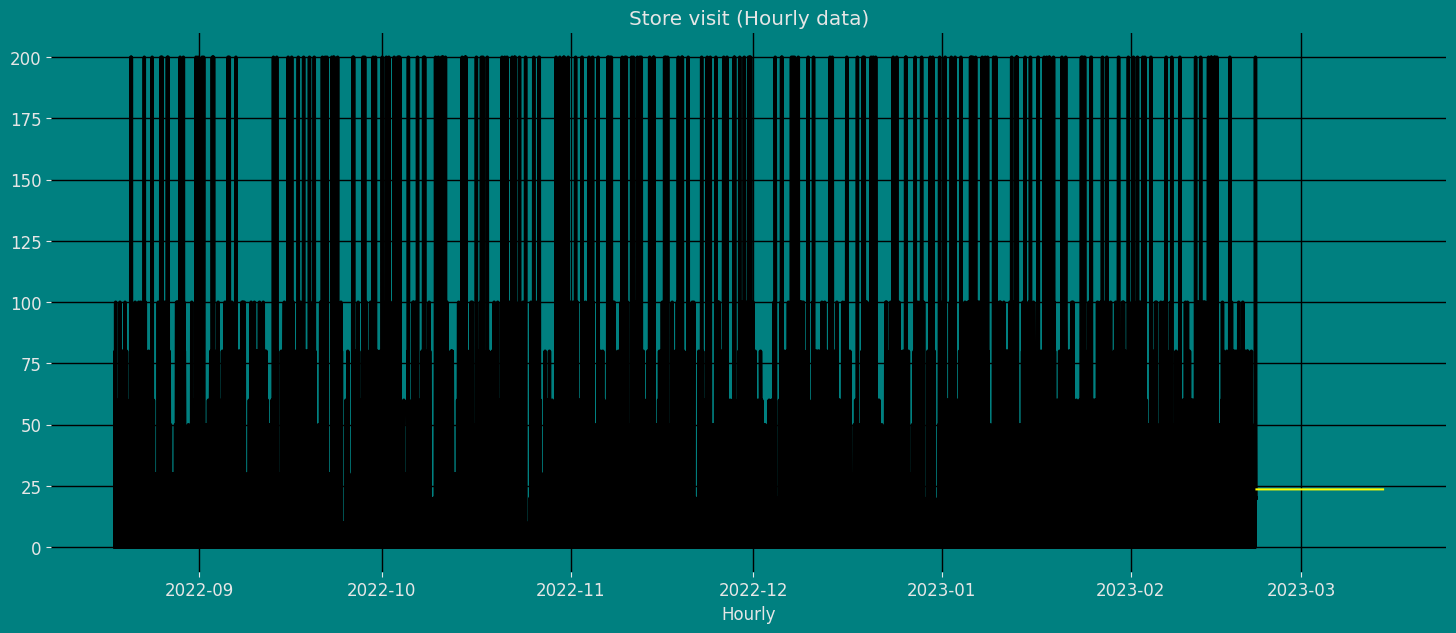

In [26]:
plt.plot(df_plot['y'],label="Actual", linewidth=2.5)
plt.plot(df_plot['CrostonClassic'], label="CrostonClassic", color="yellow") # '-', '--', '-.', ':',

plt.title("Store visit (Hourly data)");
plt.xlabel("Hourly")
plt.ylabel("")

Let's plot the same graph using the plot function that comes in `Statsforecast`, as shown below.

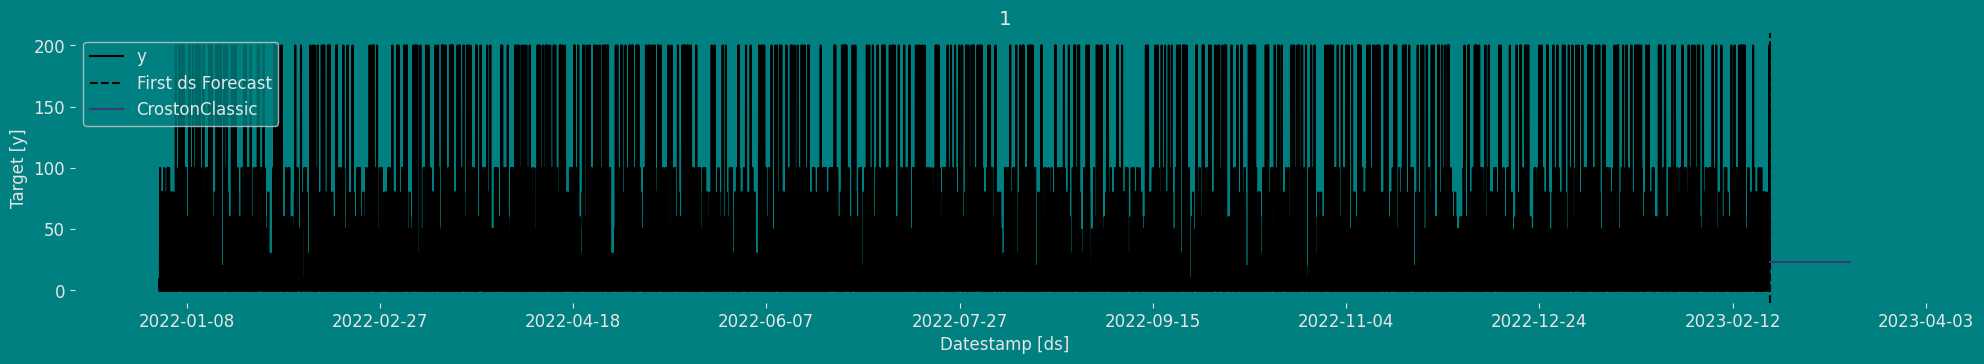

In [27]:
sf.plot(df, forecast_df)

## Cross-validation <a class="anchor" id="cross_validate"></a>

In previous steps, we’ve taken our historical data to predict the future. However, to asses its accuracy we would also like to know how the model would have performed in the past. To assess the accuracy and robustness of your models on your data perform Cross-Validation.

With time series data, Cross Validation is done by defining a sliding window across the historical data and predicting the period following it. This form of cross-validation allows us to arrive at a better estimation of our model’s predictive abilities across a wider range of temporal instances while also keeping the data in the training set contiguous as is required by our models.

The following graph depicts such a Cross Validation Strategy:

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

### Perform time series cross-validation

Cross-validation of time series models is considered a best practice but most implementations are very slow. The statsforecast library implements cross-validation as a distributed operation, making the process less time-consuming to perform. If you have big datasets you can also perform Cross Validation in a distributed cluster using Ray, Dask or Spark.

In this case, we want to evaluate the performance of each model for the last 5 months `(n_windows=)`, forecasting every second hour `(step_size=50)`. Depending on your computer, this step should take around 1 min.

The cross_validation method from the StatsForecast class takes the following arguments.

* `df:` training data frame

* `h (int):` represents $h$ steps into the future that are being forecasted. In this case, 500 hours ahead.

* `step_size (int):` step size between each window. In other words: how often do you want to run the forecasting processes.

* `n_windows(int):` number of windows used for cross validation. In other words: what number of forecasting processes in the past do you want to evaluate.

In [28]:
crossvalidation_df = sf.cross_validation(df=df,
                                         h=horizon,
                                         step_size=50,
                                         n_windows=5)

The crossvaldation_df object is a new data frame that includes the following columns:

* `unique_id:` index. If you dont like working with index just run `crossvalidation_df.resetindex()`.
* `ds:` datestamp or temporal index
* `cutoff:` the last datestamp or temporal index for the `n_windows`.
* `y:` true value
* `model:` columns with the model’s name and fitted value.

In [29]:
crossvalidation_df

,ds,cutoff,y,CrostonClassic
unique_id,,,,
1,2023-01-23 12:00:00,2023-01-23 11:00:00,0.0,23.655830
1,2023-01-23 13:00:00,2023-01-23 11:00:00,0.0,23.655830
1,2023-01-23 14:00:00,2023-01-23 11:00:00,0.0,23.655830
...,...,...,...,...
1,2023-02-21 13:00:00,2023-01-31 19:00:00,60.0,27.418417
1,2023-02-21 14:00:00,2023-01-31 19:00:00,20.0,27.418417
1,2023-02-21 15:00:00,2023-01-31 19:00:00,20.0,27.418417


We’ll now plot the forecast for each cutoff period. To make the plots clearer, we’ll rename the actual values in each period.

In [30]:
cross_validation=crossvalidation_df.copy()
cross_validation.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 

cutoff = cross_validation['cutoff'].unique()

for k in range(len(cutoff)): 
    cv = cross_validation[cross_validation['cutoff'] == cutoff[k]]
    StatsForecast.plot(df, cv.loc[:, cv.columns != 'cutoff'])

## Model Evaluation <a class="anchor" id="evaluate"></a>

We can now compute the accuracy of the forecast using an appropiate accuracy metric. Here we’ll use the Root Mean Squared Error (RMSE). To do this, we first need to `install datasetsforecast`, a Python library developed **by Nixtla** that includes a function to compute the RMSE.

In [31]:
%%capture
!pip install datasetsforecast

In [32]:
from datasetsforecast.losses import rmse

The function to compute the RMSE takes two arguments:

1. The actual values.
2. The forecasts, in this case, `Croston Classic Model`.

In [33]:
rmse = rmse(cross_validation['actual'], cross_validation["CrostonClassic"])
print("RMSE using cross-validation: ", rmse)

RMSE using cross-validation:  48.08823


# References <a class="anchor" id="references"></a>

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).

Other links: 
1. http://warwickdf.weebly.com/id--croston.html
2. https://dfep.netlify.app/sec-intermittent.html
3. https://juileetalele.medium.com/croston-model-forecasting-intermittent-demand-data-time-series-analysis-6f3a2bb1654b
4. https://forecastegy.com/posts/intermittent-time-series-forecasting-in-python/#aggregate-disagregate-intermittent-demand-approach-adida